<div style="font-family: 'Linux Libertine', serif; text-align: left;">
    <div style="font-size: 58px; font-weight: bold;color: #000000">
        <b>Options Trading: Long & Short Straddle</b>
    </div>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: auto;
               margin-right: auto;">
    <div style="font-family: 'Roboto', sans-serif;
                font-weight: bold;
                text-transform: uppercase;
                letter-spacing: 1.5px;
                color: #000000
                ">February 2, 2024 | <a href ="https://www.kaggle.com/lusfernandotorres/" style="color: #000000; text-decoration: none;">Luis Fernando Torres</a></div>
</div>

<br><br><br>
<div style="font-family: 'Roboto', Arial, sans-serif; text-align: left; font-size: 14px; letter-spacing: 1.75px; margin-top: 25px; margin-bottom: 25px;font-weight: bold;color: #000000;">
    Table of Contents
</div>
<br>

- [Introduction](#intro)<br><br>
- [Explaining Options](#exp)<br><br>
- [Annualized Volatility](#vol)<br><br>
- [Volatility Rank](#rank)<br><br>
- [Long &amp; Short Straddle](#straddle)<br><br>
- [Demo App](#app)<br><br>

<div id = 'intro'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Introduction</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Options are financial instruments that offer traders a versatile tool for hedging, speculating, and leveraging their portfolios. These instruments are a type of financial product known as <b>derivatives</b>, which grant the holder the right, though not the obligation, to buy or sell an underlying asset at a predetermined price before a specified expiration date. This unique structure allows traders to profit from market movements with relatively lower capital without purchasing the underlying asset, providing a <b>leverage effect</b> that amplifies returns.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">There are several options strategies you can employ to benefit from market movements. In this notebook, we will explore <b>Long and Short Straddles</b>, a structure based on buying or selling two options—put and call—at the same <b>strike</b> price.</p>

In [14]:
# Importing libraries

# Pandas & NumPy
import pandas as pd
import numpy as np

# Yfinance to retrieve financial data 
import yfinance as yf

# Plotly for Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<div id = 'exp'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Explaining Options</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">As previously mentioned, options are a type of financial instrument known as <b>derivatives</b>, which means that the value of these instruments derives from the value of an underlying asset.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">If you have stocks of a company, XYZ, you can have <b>call options</b> and <b>put options</b> in the market. Call options give you the right to <b>buy</b> shares of XYZ stocks at a predetermined price before or on a specified date, while put options give you the right to <b>sell</b> shares of XYZ stocks at a predetermined price before or on a specified date. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">You can buy or sell options for several reasons, from portfolio protection to speculation. Overall, you can buy calls when you bet that the shares of XYZ will <b>appreciate</b> within a time frame, and you can buy puts when you bet that the shares of XYZ will <b>depreciate</b> within a time frame.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">When dealing with options, there are some key components to keep in mind: </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;"><b>• Strike Price:</b> This is the predetermined price at which the option holder can buy or sell the underlying asset. It is beneficial to hold calls with a strike price lower than the underlying asset's price at the expiration date. The same is true for holding puts at a higher price than the underlying asset's price at the expiration date. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;"><b>• Premium:</b> The cost of the option paid by the buyer to the seller. Several factors influence the premium value, including volatility, time until expiration, and the difference between the strike price and the underlying asset's price. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;"><b>• Expiration Date:</b> The specific date by which the option must be exercised or it becomes worthless.</p>
<br>

<div id = 'vol'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Annualized Volatility</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;"><b>Volatility</b> plays a crucial role in options trading. It is a key input in options pricing models, such as the <a href ="https://en.m.wikipedia.org/wiki/Black%E2%80%93Scholes_model">Black-Scholes model</a>. Higher volatility increases the probability that the option will end up <b>in the money</b>, providing an advantageous deal for buying or selling the underlying asset on the expiration date. This increases the premium of options, allowing the trader to sell them at a higher price.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">To keep track of volatility, I will compute the <b>annualized volatility</b> of assets by using the following formula:</p>
<br>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Arial', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{Annualized Volatility} = \sigma \times \sqrt{252}
    \end{equation}
</p>

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">In the formula above, $\sigma$ represents the <b>standard deviation</b>  of returns over the last 20 trading days. We will then multiply this value by the $\sqrt{252}$ to annualize the standard deviation of returns. This scaling factor transforms the standard deviation from a per-period basis to an annual basis, allowing for easier comparison and interpretation.</p>
<br>

<div id = 'rank'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Volatility Rank</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">After computing the annualized volatility, I will break down the volatility values into <b>ten equally-sized bins</b> based on their value distribution. I will then assign label values from 1 to 10 for each volatility instance according to which quantile bin it falls into. This process transforms continuous variables into categorical variables and simplifies analysis and visualization. We are going to call this variable <b>volatility rank</b>.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">In the function defined below, <code>get_ticker</code>, we will compute the annualized volatility and volatility rank. Besides that, we will also plot the historical closing price, annualized volatility, and volatility rank.</p>
<br>

In [15]:
# Defining function 
def get_ticker(ticker):

    """
    This function takes in a ticker from Yahoo Finance as argument. 
    It then computed the returns based on the adjusted closing prices and uses it to compute the annualized volatility.
    The annualized volatility is used to create an indicator called volatility rank, in which we categorize the annualized volatility into values from 1 to 10.
    """

    # Downloading historical data
    df = yf.download(ticker)

    # Computing returns
    df['Returns'] = df['Adj Close'].pct_change()

    # Computing annualized volatility
    df['Vol'] = df['Returns'].rolling(20).std() * np.sqrt(252)
    df.dropna(axis = 0, inplace = True) # Removing null values

    # Generating array of equally-spaced points representing the quantiles to be calculated (from 0% to 100%)
    quantiles = np.quantile(df['Vol'], np.linspace(0,1,11))

    # Using quantilies to categorize and label the annualized volatility values
    quantile_labels = pd.cut(df['Vol'], bins = quantiles, 
                             labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    # Adding categorical labels to the dataframe
    df['Vol_Rank'] = quantile_labels

    # Plotting data
    fig = make_subplots(rows = 3, cols = 1, horizontal_spacing=0.2, row_heights=[.60, .20, .20], shared_xaxes=True)

    # First row --> Closing Price
    fig.add_trace(go.Scatter(
        x = df.index, y = df['Adj Close'], name = 'Closing Price'
    ), row = 1, col = 1)

    # Second row --> Annualized Volatility
    fig.add_trace(go.Scatter(
        x = df.index, y = df['Vol'], name = 'Annualized Volatility'
    ), row = 2, col = 1)

    # Third row --> Volatility rank
    fig.add_trace(go.Scatter(
        x = df.index, y = df['Vol_Rank'], name = 'Volatility Rank'
    ), row = 3, col = 1)

    # Defining subplots layout
    fig.update_layout(title = {'text': f'<b>{ticker} Closing Price & Volatility</b>'},
                      template = 'plotly_white',
                      height = 900, width = 950,
                      showlegend=False,
                      hovermode='x unified')
    
    # Defining layout of y-axes across subplots
    fig.update_yaxes(title_text = 'Closing Price ($)', row = 1)
    fig.update_yaxes(title_text = 'Annualized Volatility', row = 2)
    fig.update_yaxes(title_text = 'Volatility Rank', row = 3)

    fig.show() # Displaying plot

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Let's use the function above to retrieve data of Apple (AAPL) shares. We need to input the symbol of the asset we would like to evaluate according to how they are on the <a href="https://finance.yahoo.com/">Yahoo Finance</a> website. </p>
<br>

[*********************100%%**********************]  1 of 1 completed


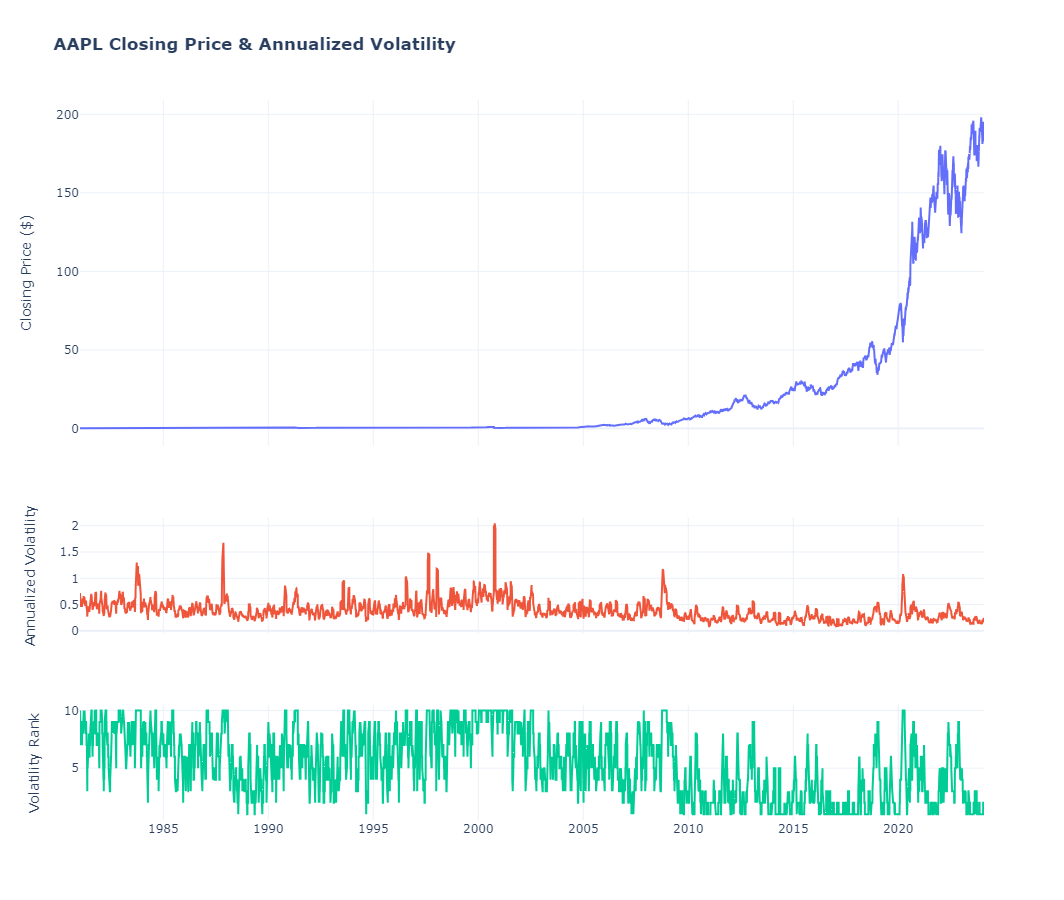

In [16]:
# Using function to extract hisorical data of Apple shares
get_ticker('AAPL')

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The volatility rank indicator ranges from 1 to 10. Values closer to 1 represent lower volatility levels, while values closer to 10 represent higher levels.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">A trader might expect more significant price movements when the volatility rank is closer to 10, which could favor strategies like long straddle. When the volatility rank is closer to 1, the trader might expect a more stable market, with lower fluctuation in prices, favoring strategies like short straddle.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The indicator also captures possible trend effects, allowing the trader to identify if volatility is increasing or decreasing in the last trading days.</p>
<br>

<div id = 'straddle'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Long &amp; Short Straddle</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">When studying options strategies, each has its own effects in limiting risk and maximizing returns. You can see terms such as long call, long put, iron condor, iron butterfly, etc.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Long and short straddle are two strategies that traders might use to capitalize on expectations of either <b>higher or lower volatility</b> and large or small price swings without having to predict the specific <b>direction</b> of price movement.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">With <b>long straddle</b>, the trader buys two instruments: a call option and a put option of the <b>same underlying asset</b> and <b>same strike price and expiry date</b>. Long straddles are used in <b>high volatility</b> scenarios, where you expect large price movements but are not sure of the <b>direction</b>.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Long straddles offer <b>unlimited profit</b> and <b>limited risk</b>. When the underlying asset appreciates or depreciates, the trader profits. The maximum loss is limited to the net premium paid for both call and put options, plus operational costs. The trader might lose money with long straddles when the underlying asset stays within a price range by the expiration date of both options.</p>
<br>

<center>
    <img src = "https://www.investopedia.com/thmb/qV1M8lVHDbCgGDEucIcT8rI5vb0=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/understandingstraddles22-19b55dd41aee458287dda61e4929428a.png">
<p style = "font-size: 16px;
            font-family: 'Arial', serif;
            text-align: center;
            margin-top: 10px;">Long Straddle. Source: <a href = "https://www.investopedia.com/terms/l/longstraddle.asp">Investopedia</a></p>
</center>

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">With <b>short straddle</b>, the trader sells two instruments: a call option and a put option of the <b>same underlying asset</b> and <b>same strike price and expiry date</b>. Short straddles are used in scenarios of <b>lower volatility</b>, where you expect none or very little price movements.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Short straddles offer <b>limited profit</b> and <b>unlimited risk</b>. When the underlying asset is closer to the strike price, the maximum profit is equal to the net premium paid for both options.</p>
<br>

<center>
    <img src = "https://shortthestrike.com/wp-content/uploads/2023/08/short_straddle_risk_profile-1024x592.png?ezimgfmt=ng:webp/ngcb1">
<p style = "font-size: 16px;
            font-family: 'Arial', serif;
            text-align: center;
            margin-top: 10px;">Short Straddle. Source: <a href = "https://www.investopedia.com/terms/l/longstraddle.asp">Shortthestrike</a></p>
</center>

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">In the <code>get_strategy</code> function, we will perform the computations necessary to find the total payoff of long and short straddles and plot the payoff plots.</p>
<br>

In [20]:
def get_strategy(ticker, strike_call, strike_put, premium_call, premium_put):

    """
    This function is used to visualize the payoffs of long and short straddle strategies of options trading.

    Params:
    ticker: Symbol of the underlying asset.
    strike_call: Strike price of the call option.
    strike_put: Strike price of the put option.
    premium_call: Premium of the call option.
    premium_put: Premium of the put option.
    """

    # Generating an array of possible prices the underlying asset might fall into
    stock_prices = np.linspace(0.79 * min(strike_put, strike_call), 1.19 * max(strike_put, strike_call), 100).round(2)

    # Computing payoffs
    # Payoffs for holding long call and put options 
    long_call_payoff = np.maximum(stock_prices - strike_call, 0) - premium_call
    long_put_payoff = np.maximum(strike_put - stock_prices, 0) - premium_put

    # Payoffs for holding short positions in call and put options
    short_call_payoff = -long_call_payoff
    short_put_payoff = -long_put_payoff

    # Combined payoffs for both long and short positions
    combined_long_payoff = long_call_payoff + long_put_payoff
    combined_short_payoff = short_call_payoff + short_put_payoff

    # Computing profit and loss for long straddle
    profit_long = np.maximum(combined_long_payoff, 0)
    loss_long = np.minimum(combined_long_payoff, 0)

    # Computing profit and loss for short straddle
    loss_short = np.minimum(combined_short_payoff, 0)
    profit_short = np.maximum(combined_short_payoff, 0)
    
    # Creating subplots
    fig = make_subplots(
        rows=2, cols=1,
        horizontal_spacing=0.2,
        row_heights=[0.5, 0.5],
        shared_xaxes=False,
        shared_yaxes=False
    )

    # Adding Long Straddle traces
    fig.add_trace(
        go.Scatter(x=stock_prices, y=long_call_payoff, mode='lines', line=dict(color='grey', dash='dash'), name='Long Call', hovertemplate='%{y:.2f}'),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=stock_prices, y=long_put_payoff, mode='lines', line=dict(color='grey', dash='dash'),  name='Long Put', hovertemplate='%{y:.2f}'),
        row=1, col=1
    )

    # Adding Short Straddle traces
    fig.add_trace(
        go.Scatter(x=stock_prices, y=short_call_payoff, mode='lines', line=dict(color='grey', dash='dash'),  name='Short Call', hovertemplate='%{y:.2f}'),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=stock_prices, y=short_put_payoff, mode='lines', line=dict(color='grey', dash='dash'), name='Short Put', hovertemplate='%{y:.2f}'),
        row=2, col=1
    )
    

    # Adding the payoff lines for Long Straddle
    fig.add_trace(
        go.Scatter(x=stock_prices, y=profit_long, mode='lines', line=dict(color='black', dash='solid'), name='Profit', hovertemplate='%{y:.2f}',
                    fill='tozeroy', fillcolor='rgba(0, 255, 0, 0.5)'),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=stock_prices, y=loss_long, mode='lines', line=dict(color='black', dash='solid'), name='Loss', hovertemplate='%{y:.2f}',
                    fill='tozeroy', fillcolor='rgba(255, 0, 0, 0.5)'),
        row=1, col=1
    )

    # Adding the payoff lines for Long Straddle
    fig.add_trace(
        go.Scatter(x=stock_prices, y=loss_short, mode='lines', line=dict(color='black', dash='solid'), name = 'Loss', hovertemplate='%{y:.2f}',
                   fill='tozeroy', fillcolor='rgba(255, 0, 0, 0.5)'),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=stock_prices, y=profit_short, mode='lines', line=dict(color='black', dash='solid'), name = 'Profit', hovertemplate='%{y:.2f}',
                   fill='tozeroy', fillcolor='rgba(0, 255, 0, 0.5)'),
        row=2, col=1
    )

    
    # Defining layout
    fig.update_layout(
        title={'text': f'<b>{ticker} Long & Short Straddle</b>'},
        template='plotly_white',
        height=1000, width=750,
        showlegend=False,
        hovermode='x unified')

    # Defining y-axes and x-axes tiles across rows
    fig.update_yaxes(title_text='Long Payoff ($)', row=1)
    fig.update_yaxes(title_text='Short Payoff ($)', row=2)
    fig.update_xaxes(title_text = 'Underlying Asset Price at Expiration', row=1)
    fig.update_xaxes(title_text = 'Underlying Asset Price at Expiration', row=2)

    fig.show() # Displaying plot

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">With the function above, we can compute payoffs for put and call options of Apple stocks. We start by inputting the ticker, <i>"AAPL"</i>, and then the strike prices for the call and put options, which is U$187.50. We finish by inputting the premium for the call and put options respectively.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">By using the function above, you may input different strike prices for both options. This would return the payoffs for a different options trading strategy called <b><i>Strangle</i></b>, which is very similar to straddles.</p>
<br>

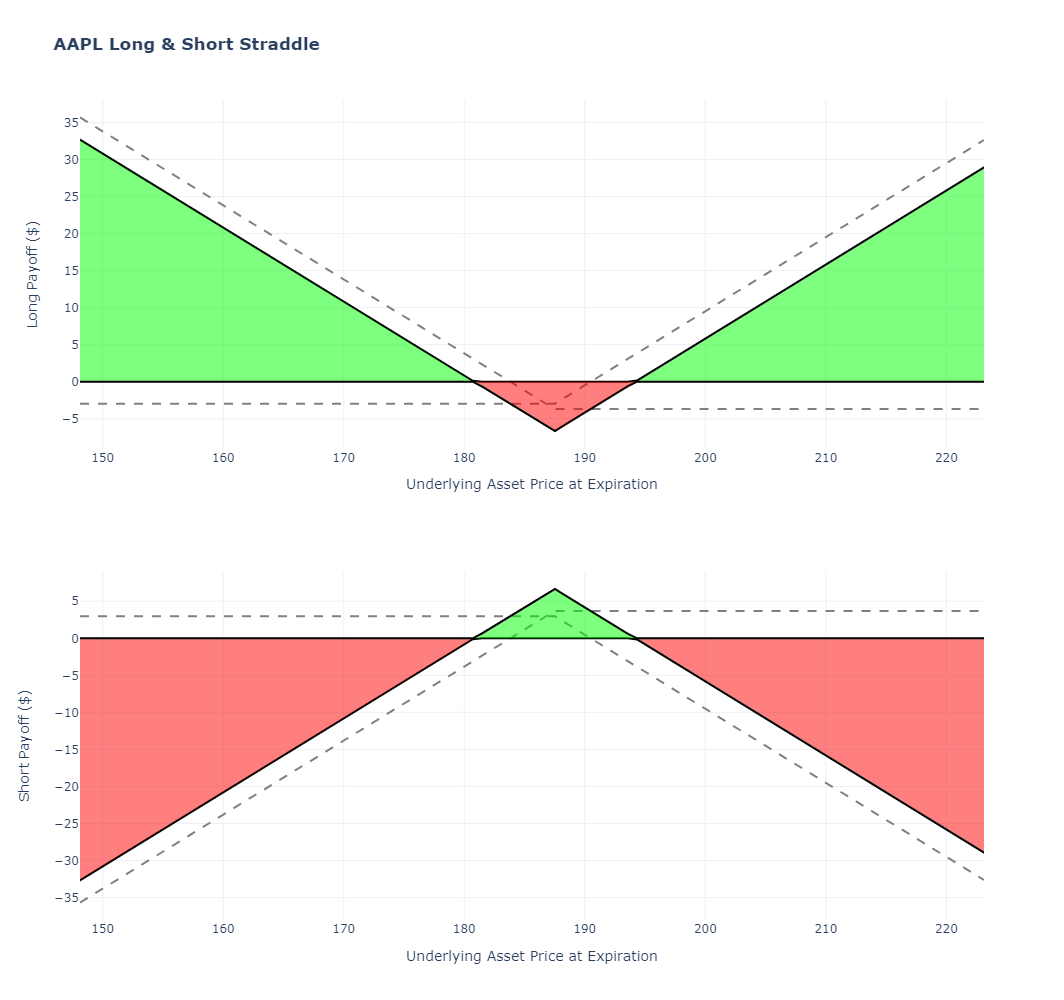

In [21]:
# Using function to obtain long and short straddle payoffs
get_strategy('AAPL', 187.50, 187.50, 2.99, 3.70)

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The first plot shows the payoff for a long straddle strategy, where the trader profits as the underlying asset appreciates or depreciates further from the strike price. The second plot shows the payoff for a short straddle strategy, where the trader profits while the underlying asset is as close as possible to the strike price.</p>
<br>

<div id = 'app'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Demo App</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">I have designed a demo app using <a href="https://streamlit.io/">Streamlit</a>, an open-source Python framework for Data Science and Machine Learning apps, so you can input your tickers and values to perform your own analyses.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">You can use the demo app by clicking on <a href="https://huggingface.co/spaces/luisotorres/long_and_short_straddle"> Options Trading: Long &amp; Short Straddle</a>. You will see a small text explaining the app and a small text about the parameters.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Below the parameters, you might input your own ticker, strike prices, and premiums. Any symbol available on Yahoo Finance will probably work. Click on the <code>Analyze and Visualize Straddle</code> button to make it run. You will also be able to zoom in and out of the plots.</p>
<br>

<center>
    <img src = "https://i.imgur.com/xTZuNHu.png">
<p style = "font-size: 16px;
            font-family: 'Arial', serif;
            text-align: center;
            margin-top: 10px;">Long &amp; Short Straddle Demo App. Source: <a href = "https://huggingface.co/spaces/luisotorres/long_and_short_straddle">HuggingFace</a></p>
</center>

<center>
    <img src = "https://i.imgur.com/zULpFsE.png">
<p style = "font-size: 16px;
            font-family: 'Arial', serif;
            text-align: center;
            margin-top: 10px;">Long &amp; Short Straddle Demo App. Source: <a href = "https://huggingface.co/spaces/luisotorres/long_and_short_straddle">HuggingFace</a></p>
</center>

<center>
    <img src = "https://i.imgur.com/i9zVIYw.png">
<p style = "font-size: 16px;
            font-family: 'Arial', serif;
            text-align: center;
            margin-top: 10px;">Long &amp; Short Straddle Demo App. Source: <a href = "https://huggingface.co/spaces/luisotorres/long_and_short_straddle">HuggingFace</a></p>
</center>

<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Thank you so much for reading thus far. If you have any doubts or feedback about the demo app or any ideas and suggestions for the subject approached in this notebook, feel free to leave a message. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">If you believe this notebook is helpful, feel free to upvote it.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Thank you very much!</p>
<br>

<hr style="border: 0; 
           height: 1px; 
           border-top: 0.85px; 
           solid #b2b2b2">
           
<div style="text-align: left; 
            color: #8d8d8d; 
            padding-left: 15px; 
            font-size: 14.25px;">
    Luis Fernando Torres, 2024<br><br>
    Let's connect!🔗<br>
    <a href="https://www.linkedin.com/in/luuisotorres/">LinkedIn</a> • <a href="https://medium.com/@luuisotorres">Medium</a> • <a href = "https://huggingface.co/luisotorres">Hugging Face</a><br><br>
</div>
<div style="text-align: center; 
            margin-top: 50px;
            color: #8d8d8d; 
            padding-left: 15px; 
            font-size: 14.25px;"><b>Like my content? Feel free to <a href="https://www.buymeacoffee.com/luuisotorres">Buy Me a Coffee ☕</a></b>
</div>
<div style="text-align: center; 
            margin-top: 80px;
            color: #8d8d8d; 
            padding-left: 15px; 
            font-size: 14.25px;"><b>  <a href = "https://luuisotorres.github.io/">https://luuisotorres.github.io/</a> </b>
</div>